# Определение стоимости автомобилей

Цель - построить модель для определения стоимости. 
Разработать приложение,чтобы в нём можно быстро узнать рыночную стоимость своего автомобиля.  

##### Признаки

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

##### Целевой признак

- Price — цена (евро)

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn  import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/datasets/autos.csv')
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [ ]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [ ]:
data.duplicated().sum()

4

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [ ]:
print(data.isna().sum()/len(data)*100)

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579487
RegistrationYear      0.000000
Gearbox               5.596772
Power                 0.000000
Model                 5.560651
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.282802
Brand                 0.000000
NotRepaired          20.079297
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64


In [ ]:
datecrawled = pd.to_datetime(data['DateCrawled'])
datecrawled.max()

Timestamp('2016-04-07 14:36:58')

Удалим столбцы, которые не пригодятся для обучения модели.

In [ ]:
data = data.drop(['DateCrawled', 'RegistrationMonth',  'NumberOfPictures', 'PostalCode', 'LastSeen', 'DateCreated'], axis='columns')

В столбцах 'Model' и 'NotRepaired' пропуски заполнить корректно не получится, заменим на 'unknown'

In [ ]:
data['Model'] = data['Model'].fillna('unknown')

In [ ]:
data['NotRepaired'] = data['NotRepaired'].fillna('unknown')
data.tail(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
354359,7900,sedan,2010,manual,140,golf,150000,gasoline,volkswagen,no
354360,3999,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354361,5250,NaN,2016,auto,150,159,150000,NaN,alfa_romeo,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
354364,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2200,NaN,2005,NaN,0,unknown,20000,NaN,sonstige_autos,unknown
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no
354368,3400,wagon,2002,manual,100,golf,150000,gasoline,volkswagen,unknown


Данные в столбце 'VehicleType' заполним самыми частыми значениями в сгруппированной таблице.

In [ ]:
data['VehicleType'] = data['VehicleType'].fillna(data.groupby('Model')['VehicleType'].transform(lambda x: x.value_counts().idxmax()))
print(sum(data['VehicleType'].isna()))

0


Также заполним пропуски в столбцах 'Gearbox' и 'FuelType'  

In [ ]:
data['Gearbox'] = data['Gearbox'].fillna(data.groupby('Model')['Gearbox'].transform(lambda x: x.value_counts().idxmax()))
print(sum(data['Gearbox'].isna()))

0


In [ ]:
data['FuelType'] = data['FuelType'].fillna(data.groupby('Model')['FuelType'].transform(lambda x: x.value_counts().idxmax()))
print(sum(data['FuelType'].isna()))

0


In [ ]:
data.iloc[26]

Price                   5555
VehicleType            sedan
RegistrationYear        2017
Gearbox               manual
Power                    125
Model                     c4
Kilometer             125000
FuelType            gasoline
Brand                citroen
NotRepaired               no
Name: 26, dtype: object

In [ ]:
data.tail(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
354359,7900,sedan,2010,manual,140,golf,150000,gasoline,volkswagen,no
354360,3999,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354361,5250,wagon,2016,auto,150,159,150000,gasoline,alfa_romeo,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
354364,0,sedan,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2200,sedan,2005,manual,0,unknown,20000,petrol,sonstige_autos,unknown
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no
354368,3400,wagon,2002,manual,100,golf,150000,gasoline,volkswagen,unknown


In [ ]:
print('Строки с нулевой ценой: ',len(data.loc[data['Price']==0]))
print('Строки с нулевой ценой, %: ', len(data.loc[data['Price']==0])/len(data)*100)

Строки с нулевой ценой:  10772
Строки с нулевой ценой, %:  3.0398035923412303


Причина нулевой цены неизвестна, но цена авто не может быть 0. Пропусков всего 3%, удалим эти строки.

In [ ]:
data = data.loc[data['Price']!=0]

Первый автомобиль с ДВС был зарегистрирован в 1886 году. Будем считать это минимальным значением. Максимальным будем считать 2022 г.

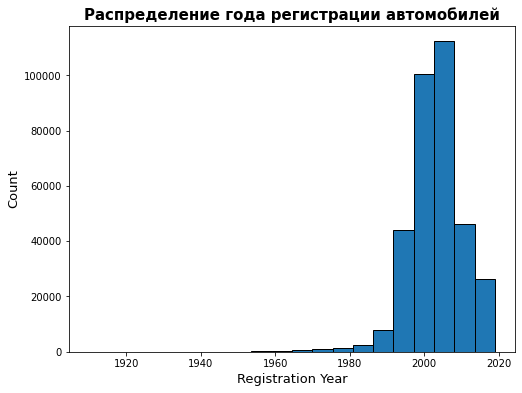

In [ ]:
data = data.loc[(data['RegistrationYear'] >= 1886) & (data['RegistrationYear'] <= 2022)]
data['RegistrationYear'].hist(bins=20, figsize=(8,6), ec='black', grid=False)
plt.xlabel('Registration Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Распределение года регистрации автомобилей', fontsize=15, fontweight='bold')
plt.show()

<div class="alert alert-info">
    
'DateCrawled' нам говорит, что дата скачивания анкеты из базы '2016-04-07 14:36:58'. Это значит, что максимальное значение будет 2016 год. А из графика видно, что минимальное значение 1960 год.
</div>

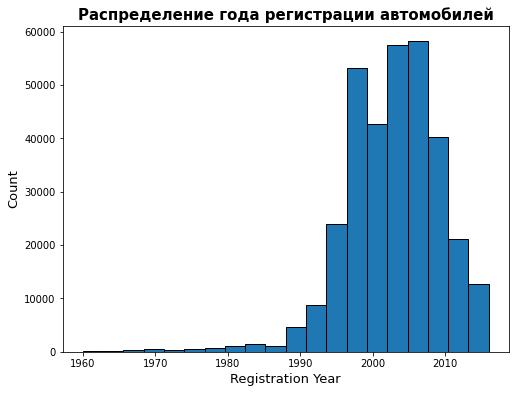

In [ ]:
data = data.loc[(data['RegistrationYear'] >= 1960) & (data['RegistrationYear'] <= 2016)]
data['RegistrationYear'].hist(bins=20, figsize=(8,6), ec='black', grid=False)
plt.xlabel('Registration Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Распределение года регистрации автомобилей', fontsize=15, fontweight='bold')
plt.show()

Не нашел автомобиль мощнее 2012 лс. Удалим аномальные значения, которые больше 2012. И нулевые значения уберем.

In [ ]:
data = data.loc[(data['Power'] < 2012) & (data['Power'] != 0)]
print(sum(data['Power'].isna()))

0


In [ ]:
data.shape

(296644, 10)

In [ ]:
print('Удалено: {:.2%}'.format((354369-296644)/354369))

Удалено: 16.29%


##### Вывод
* Загрузили и изучили данные
* Удалили дубли (их всего 4)
* Часть пропусков заполнены на основе данных датасета
* Удалили 16.29% данных

   
Если дубли возникли после заполнения пропусков, то далеко не факт, что это истинные дубли (то есть абсолютно аналогичные объекты, которые почему-то несколько раз попали в выборку). Я бы не удалял.

In [ ]:
data.duplicated().sum()

41424

In [ ]:
print(data.isna().sum())

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64


## Обучение моделей

Задействуем технику прямого кодирования, чтобы преобразовать категориальные признаки в численные.

In [ ]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [ ]:
features_lr = data_ohe.drop(['Price'], axis = 1)
target_lr = data_ohe['Price']

In [ ]:
data[['VehicleType','Gearbox', 'Model', 'FuelType','Brand','NotRepaired']] = data[['VehicleType',
            'Gearbox', 'Model', 'FuelType','Brand','NotRepaired']].astype('category')

Признаки для обучения модели LGBM

In [ ]:
features = data.drop(['Price'], axis = 1)
target = data['Price']

In [ ]:
features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(features_lr, target_lr, test_size=.2, random_state=12345)
print(features_train_lr.shape, features_test_lr.shape, target_train_lr.shape, target_test_lr.shape)

(237315, 307) (59329, 307) (237315,) (59329,)


In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.4, random_state=12345)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(177986, 9) (118658, 9) (177986,) (118658,)


In [ ]:
features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, test_size=0.5)

##### LinearRegression

In [ ]:
model_lr = LinearRegression()

In [ ]:
%%time
model_lr.fit(features_train_lr, target_train_lr)

CPU times: user 25.7 s, sys: 26.7 s, total: 52.4 s
Wall time: 52.6 s


LinearRegression()

In [ ]:
%%time
predicted_lr = pd.Series(model_lr.predict(features_test_lr))

mse = mean_squared_error(target_test, predicted_lr)
print('RMSE для LinearRegression на тестовой выборке: {:.2f}'.format((mse.mean()**0.5)))

RMSE для LinearRegression на тестовой выборке: 5937.65
CPU times: user 153 ms, sys: 152 ms, total: 304 ms
Wall time: 284 ms


In [ ]:
scaler = StandardScaler()
scaler.fit(features_train_lr)
features_train_scaled = scaler.transform(features_train_lr)
features_test_scaled = scaler.transform(features_test_lr)

In [ ]:
%%time
model_lr.fit(features_train_scaled, target_train_lr)

CPU times: user 23.4 s, sys: 21.7 s, total: 45.1 s
Wall time: 45.2 s


LinearRegression()

In [ ]:
%%time
predicted_lr = pd.Series(model_lr.predict(features_test_scaled))

mse = mean_squared_error(target_test, predicted_lr)
print('RMSE для LinearRegression на тестовой выборке: {:.2f}'.format((mse.mean()**0.5)))

RMSE для LinearRegression на тестовой выборке: 5937.65
CPU times: user 84.2 ms, sys: 89.5 ms, total: 174 ms
Wall time: 185 ms


##### LightGBM

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0,
    "num_leaves": 45
}

In [ ]:
model_lgbm = LGBMRegressor(**params)

In [ ]:
%%time
model_lgbm.fit(features_train, target_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.306808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

LGBMRegressor(max_depth=6, metric='rmse', num_leaves=45, objective='regression',
              verbose=0)

In [ ]:
%%time
predictions_lgbm = model_lgbm.predict(features_test)

mse = mean_squared_error(target_test, predictions_lgbm)
print('RMSE для LightGBM на тестовой выборке: {:.2f}'.format((mse.mean()**0.5)))

RMSE для LightGBM на тестовой выборке: 1634.98
CPU times: user 741 ms, sys: 0 ns, total: 741 ms
Wall time: 767 ms


##### CatBoost

In [ ]:
cat_features = ['VehicleType','Gearbox', 'Model', 'FuelType','Brand','NotRepaired']

In [ ]:
%%time
cat = CatBoostRegressor(iterations=100, verbose=False,cat_features=cat_features)
cat_params = {'learning_rate':[0.1, 0.3, 0.5], 'depth':[5,10, 15]} 
cat_grid = GridSearchCV(cat, cat_params, scoring='neg_mean_squared_error',  cv=3, n_jobs = -1)
cat_grid.fit(features_train, target_train)
print('Лучшие гиперпараметры для модели: ', cat_grid.best_params_)

Лучшие гиперпараметры для модели:  {'depth': 15, 'learning_rate': 0.3}
CPU times: user 9min 32s, sys: 1min 36s, total: 11min 9s
Wall time: 11min 22s


In [ ]:
%%time
cat_test = CatBoostRegressor(iterations=100, verbose=False,cat_features = cat_features, 
                        learning_rate=0.3, depth=15, random_state=12345 )
cat_test.fit(features_train, target_train)

CPU times: user 53 s, sys: 11 s, total: 1min 4s
Wall time: 1min 5s


In [ ]:
%%time
predictions_cat = cat_test.predict(features_test)

CPU times: user 97.8 ms, sys: 429 µs, total: 98.2 ms
Wall time: 103 ms


In [ ]:
mse = mean_squared_error(target_test, predictions_cat)
print('RMSE для CatBoost на тестовой выборке: {:.2f}'.format((mse.mean()**0.5)))

RMSE для CatBoost на тестовой выборке: 1591.03


## Анализ моделей

In [ ]:
data = {'Модель': ['Linear Regression', 'LightGBM', 'CatBoost'], 'RMSE': [5937.65, 1634.98, 1591.03],
     'Время обучения':['44.3 s' , '6min 10s' , '1min 1s'],'Время предсказания' : ['185 ms', '767 ms', '103 ms']}
data_pivot = pd.DataFrame.from_dict(data)
display(data_pivot)

,Модель,RMSE,Время обучения,Время предсказания
0,Linear Regression,5937.65,44.3 s,185 ms
1,LightGBM,1634.98,6min 10s,767 ms
2,CatBoost,1591.03,1min 1s,103 ms


#### Вывод
Метрика RMSE лучше всего у модели CatBoost, и время предсказания у нее лучшее, а вот время обучения лучше всех у 'Linear Regression'. Дольше всего обучается модель LightGBM, но RMSE у нее не сильно хуже CatBoost.